In [16]:
import pandas as pd
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [1]:
import ADPLearn as adp

i

NameError: name 'i' is not defined

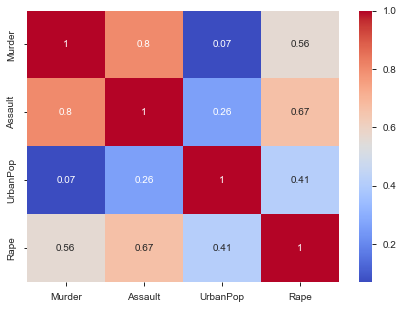

In [98]:
corr_plot(df, 'heatmap')

In [105]:
df.dtypes != object
# fig, ax = plt.subplots(2, 2, figsize=(20, 12))

Unnamed: 0    False
Murder         True
Assault        True
UrbanPop       True
Rape           True
dtype: bool

In [13]:
corr_plot(df, 'heatmap')

NameError: name 'corr_plot' is not defined

<AxesSubplot:>

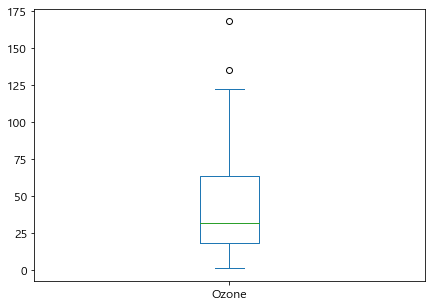

In [ ]:
airquality.Ozone.plot.box()

In [ ]:
Q1, Q3 = airquality.Ozone.quantile([.25, .75])
L_M, U_M = Q1-(Q3-Q1)*1.5, Q3+(Q3-Q1)*1.5

upperOutlier = airquality.query("Ozone > @U_M")
lowerOutlier = airquality.query("Ozone < @L_M")

In [96]:
import pandas as pd
import ADPLearn as adp
import numpy as np

# 데이터 로드 & 확인
fifa = pd.read_pickle('https://github.com/ksky1313/ADP/raw/main/data/fifa.pk')
fifa.head(3)

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290


### ADP 데이터 모의고사(데이터 에듀)
1. FIFA 데이터 선수의 키는 Height 변수에 피트와 인치로 입력되어 있다.
    - 이를 cm로 변환하여 새로운 변수 'Height_cm'을 생성하시오.

In [110]:
# 데이터 구성 확인
print("Cat: ", list(fifa.columns[fifa.dtypes == 'object']))
print("Num: ", list(fifa.columns[fifa.dtypes != 'object']))

Cat:  ['Name', 'Nationality', 'Club', 'Preferred_Foot', 'Work_Rate', 'Position', 'Height']
Num:  ['ID', 'Age', 'Overall', 'Jersey_Number', 'Contract_Valid_Until', 'Weight_lb', 'Release_Clause', 'Value', 'Wage', 'Height_cm']


In [98]:
# Height 데이터 확인
# ex) 5'7 = 5feet 7inch, 1 feet = 30.48cm, 1 inch = 2.54cm
fifa[['Height']].head()

,Height
0,5'7
1,6'2
2,5'9
3,6'4
4,5'11


In [101]:
# 피트를 cm로 변환하는 함수
def feet_to_cm(feet):
    f, i = feet.split("'")
    return float(f) * 30.48 + float(i) * 2.54

# 피트를 cm로 변환하여 'Height_cm' 컬럼에 저장
fifa['Height_cm'] = fifa.Height.apply(feet_to_cm)
fifa[['Height_cm']].head()

,Height_cm
0,170.18
1,187.96
2,175.26
3,193.04
4,180.34


2) 포지션을 의미하는 Position 변수를 아래 표를 참고하여 
    - "Forward", "Midfielder", "Defender", "GoalKeeper"로 범주화하고 
    - factor 형으로 변환하여 Position_Class라는 변수를 저장하시오.
        * Forward : LS, ST, RS, LW, LF, CF, RF, RW
        * Midfielder : LAM, CAM, RAM, LM, LCM, CM, RCM, RM
        * Defender : LWB, LDM, DCM, RDM, RWB, LB, LCB, CB, RCB, RB
        * GoalKeeper : GK
    

In [109]:
# 전에 범주의 갯수를 확인
fifa.Position.nunique()

27

In [126]:
# 범주화
Forward = [ 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW' ]
Midfielder = [ 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM' ]
Defender = [ 'LWB', 'LDM', 'DCM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB' ]
GoalKeeper = [ 'GK' ]

fifa['Position_Class'] = np.where( np.isin(fifa.Position, Forward), 'Forward',
    np.where( np.isin(fifa.Position, Midfielder), 'Midfielder',
        np.where( np.isin(fifa.Position, Defender), 'Defender', 'GoalKeeper')
    )
)
fifa[['Position_Class']]

,Position_Class
0,Forward
1,Forward
2,Forward
3,GoalKeeper
4,Midfielder
...,...
16637,Midfielder
16638,Forward
16639,Forward
16640,Forward


In [137]:
# 결과 & 데이터 타입 확인
fifa.Position_Class.value_counts()

Defender      5890
Midfielder    4935
Forward       3044
GoalKeeper    2773
Name: Position_Class, dtype: int64

In [141]:
# 범주화 결과 검증
print("Defender: {}".format(np.isin(fifa.Position, Defender).sum()))
print("Midfielder: {}".format(np.isin(fifa.Position, Midfielder).sum()))
print("Forward: {}".format(np.isin(fifa.Position, Forward).sum()))
print("GoalKeeper: {}".format(np.isin(fifa.Position, GoalKeeper).sum()))

Defender: 5890
Midfielder: 4935
Forward: 3044
GoalKeeper: 1900


In [57]:
import pandas as pd
import numpy as np
midwest= pd.read_csv("http://goo.gl/G1K41K")

Q1) poptotal(전체인구) 변수를 total 로, popasian(아시아인구) 변수를 asian으로 수정하세요

In [58]:
old_cols = np.array(midwest.columns)
midwest.columns = list(np.where( cols == 'popasian', 'asian',
    np.where( cols == 'poptotal', 'total', cols)))
midwest.columns

Index(['PID', 'county', 'state', 'area', 'total', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'asian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category'],
      dtype='object')

Q2) total, asian 변수를 이용해 '전체 인구 대비 아시아 인구 백분율' 파생변수를 만드세요.

In [59]:
midwest[['asian', 'total']].head()
midwest.eval("asian_pct = asian / total", inplace=True)
midwest[['asian', 'total', 'asian_pct']].head()

,asian,total,asian_pct
0,249,66090,0.003768
1,48,10626,0.004517
2,16,14991,0.001067
3,150,30806,0.004869
4,5,5836,0.000857


Q3) 아시아 인구 백분율 전체평균을 구하고, 평균을 초과하면 'large', 그 외에는 'small'을 부여하는 파생변수를 만드세요.

In [61]:
# Q3
asian_mean = midwest.asian_pct.mean()
midwest['asian_group'] = np.where(midwest.asian_pct > asian_mean, 'large', 'small')
midwest[['asian', 'total', 'asian_pct', 'asian_group']].head()

,asian,total,asian_pct,asian_group
0,249,66090,0.003768,small
1,48,10626,0.004517,small
2,16,14991,0.001067,small
3,150,30806,0.004869,small
4,5,5836,0.000857,small


Q4) 전체인구 대비 아시아 인구 백분율이 가장 높은 상위 5개 country(지역)의 지역명과 전체인구대비 아시아 인구 백분율을 함께 출력하세요.

In [133]:
midwest[['county', 'asian_pct']].nlargest(5, columns=['asian_pct'])